# Lab 2

Dmytro Geleshko

IP-91

## Imports

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Config

In [92]:
plt.rcParams["figure.figsize"] = (20, 20)
pd.options.display.float_format ="{:,.2f}".format

# Data

## Load
Loading data as DataFrame using pandas

In [93]:
df = pd.read_csv("../Data/TitanicSurvival.csv")
df.rename(columns={
    "Unnamed: 0": "name",
    "passengerClass": "class"
    }, inplace=True)
df

,name,survived,sex,age,class
0,"Allen, Miss. Elisabeth Walton",yes,female,29.00,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.92,1st
2,"Allison, Miss. Helen Loraine",no,female,2.00,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.00,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.00,1st
...,...,...,...,...,...
1304,"Zabour, Miss. Hileni",no,female,14.50,3rd
1305,"Zabour, Miss. Thamine",no,female,NaN,3rd
1306,"Zakarian, Mr. Mapriededer",no,male,26.50,3rd
1307,"Zakarian, Mr. Ortin",no,male,27.00,3rd


## Info
Get some info about data

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      1309 non-null   object 
 1   survived  1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   class     1309 non-null   object 
dtypes: float64(1), object(4)
memory usage: 51.3+ KB


## Fill missing age values
Only about 20% of values in age column are missing so we will fill NaN's with mean age.

In [95]:
df["age"].fillna(df["age"].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      1309 non-null   object 
 1   survived  1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1309 non-null   float64
 4   class     1309 non-null   object 
dtypes: float64(1), object(4)
memory usage: 51.3+ KB


## Transform and Cast

In [96]:
# str to int
temp = df.pop("sex")
df["isMale"] = (temp == "male").astype(np.int32)

# str to int
df["survived"] = (df["survived"] == "yes").astype(np.int32)

# str to numerical
df["class"] = df["class"].apply(lambda x: x[0]).astype(np.int32)

# float64 to float32
df["age"] = df["age"].astype(np.float32)

df

,name,survived,age,class,isMale
0,"Allen, Miss. Elisabeth Walton",1,29.00,1,0
1,"Allison, Master. Hudson Trevor",1,0.92,1,1
2,"Allison, Miss. Helen Loraine",0,2.00,1,0
3,"Allison, Mr. Hudson Joshua Crei",0,30.00,1,1
4,"Allison, Mrs. Hudson J C (Bessi",0,25.00,1,0
...,...,...,...,...,...
1304,"Zabour, Miss. Hileni",0,14.50,3,0
1305,"Zabour, Miss. Thamine",0,29.88,3,0
1306,"Zakarian, Mr. Mapriededer",0,26.50,3,1
1307,"Zakarian, Mr. Ortin",0,27.00,3,1


## Stats
Get stats about our data

In [97]:
df.describe()

,survived,age,class,isMale
count,"1,309.00","1,309.00","1,309.00","1,309.00"
mean,0.38,29.88,2.29,0.64
std,0.49,12.88,0.84,0.48
min,0.00,0.17,1.00,0.00
25%,0.00,22.00,2.00,0.00
50%,0.00,29.88,3.00,1.00
75%,1.00,35.00,3.00,1.00
max,1.00,80.00,3.00,1.00


# Plots

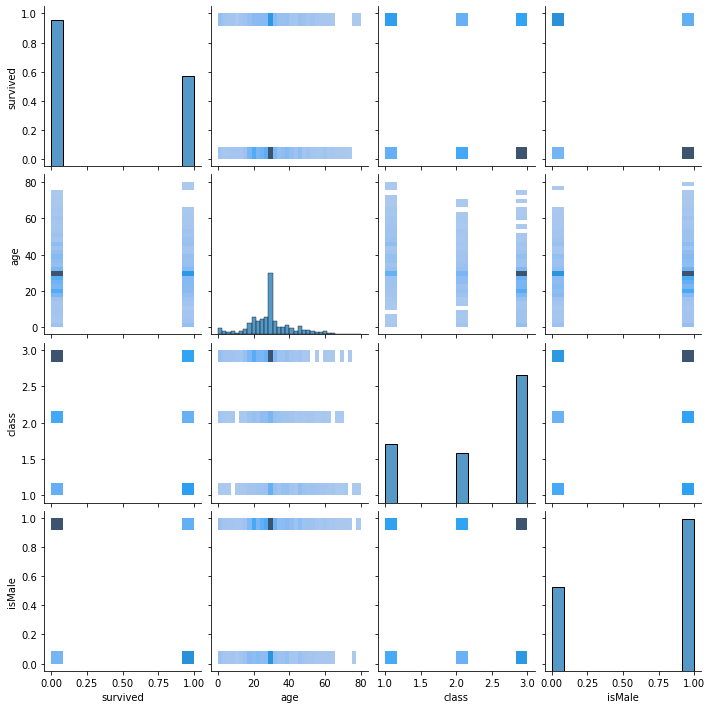

In [101]:
sns.pairplot(data=df, kind="hist")
plt.show()

# The End